In [1]:
#Bring in the Health Care Facilities with JSON

import pandas as pd

import json      # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint    # library for cleanly printing Python data structures
pp = pprint.PrettyPrinter()


## Start off by mapping and reading data from geojson URLs

In [113]:
# download data on facilities

facilities_url = "https://data.sfgov.org/resource/jhsu-2pka.geojson"
facilities_response = requests.get(facilities_url)
facilities_results = facilities_response.text

In [114]:
# what's the data type of the results?

type(facilities_results)

str

In [115]:
# print the first 500 characters to see a sample of the data

print(facilities_results[:500])

{ "type": "FeatureCollection", "features": [{"type":"Feature","geometry":{"type":"Point","coordinates":[-122.4358177,37.76905419]},"properties":{"facility_type":"General Acute Care Hospital","services":"Hospital","oshpd_id":"106380933","uid":"2","facility_name":"California Pacific Med Ctr-davies Campus"}},{"type":"Feature","geometry":{"type":"Point","coordinates":[-122.43329371,37.72674014]},"properties":{"facility_type":"Community Clinic","services":"Senior Health","oshpd_id":"306384163","uid":


In [116]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary
facilities_data = json.loads(facilities_results)  # loads = "load string"

type(facilities_data)

dict

In [117]:
# print the dictionary

pp.pprint(facilities_data)

{'crs': {'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'},
         'type': 'name'},
 'features': [{'geometry': {'coordinates': [-122.4358177, 37.76905419],
                            'type': 'Point'},
               'properties': {'facility_name': 'California Pacific Med '
                                               'Ctr-davies Campus',
                              'facility_type': 'General Acute Care Hospital',
                              'oshpd_id': '106380933',
                              'services': 'Hospital',
                              'uid': '2'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [-122.43329371, 37.72674014],
                            'type': 'Point'},
               'properties': {'facility_name': 'On Lok Senior Health '
                                               'Services-mission Center',
                              'facility_type': 'Community Clinic',
                              'oshpd_id': '306384163'

                            'type': 'Point'},
               'properties': {'facility_name': "St. Luke's Health Care Center "
                                               "- Women's Clinic",
                              'facility_type': 'Community Clinic',
                              'oshpd_id': '306384183',
                              'services': 'Womens Health',
                              'uid': '52'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [-122.49761417, 37.77575714],
                            'type': 'Point'},
               'properties': {'facility_name': 'Richmond Maxi-center',
                              'facility_type': 'Community Clinic',
                              'oshpd_id': '306381330',
                              'services': 'Cultural General Health',
                              'uid': '45'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [-122.450374, 37.76999193],
                

In [118]:
"""
Link to map of SF Health Care Facilities
http://geojson.io/#map=13/37.7559/-122.4449
    
Can add and map data using this link:
https://data.sfgov.org/resource/jhsu-2pka.geojson
"""

'\nLink to map of SF Health Care Facilities\nhttp://geojson.io/#map=13/37.7559/-122.4449\n    \nCan add and map data using this link:\nhttps://data.sfgov.org/resource/jhsu-2pka.geojson\n'

In [119]:
# download data on Muni transpo network

muninw_url = "https://data.sfgov.org/resource/9exe-acju.geojson"
muninw_response = requests.get(muninw_url)
muninw_results = muninw_response.text

# what's the data type of the results?

type(muninw_results)

str

In [120]:
# print the first 500 characters to see a sample of the data

print(muninw_results[:500])

{ "type": "FeatureCollection", "features": [{"type":"Feature","geometry":{"type":"LineString","coordinates":[[-122.3969547857808,37.795431052464615],[-122.39779578577077,37.79443405260821],[-122.39896978561259,37.79428405270635],[-122.40014778545387,37.79413405280481],[-122.40131378529652,37.793987052902175],[-122.40215878518262,37.79388005297274],[-122.40295678507499,37.793779053039415],[-122.40401578493208,37.79364605312776],[-122.40461278585225,37.79356505317804],[-122.40612878464714,37.79337


In [10]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary
muninw_data = json.loads(muninw_results)  # loads = "load string"

type(muninw_data)

dict

In [ ]:
"""
Link to map of Muni Network
http://geojson.io
    
Add data using this link:
https://data.sfgov.org/resource/9exe-acju.geojson


## This transit network dataset seems too big for GeoJson's maping link - might wanna try with geopandas

In [25]:
import matplotlib.pyplot as plt
import geopandas as gdp

In [45]:
import geopandas as gpd
import requests
data = requests.get("https://data.sfgov.org/resource/jhsu-2pka.json") 
#Tried doing similar steps with read_file() and geojson but it was :(
gdf = gpd.GeoDataFrame(data.json())
gdf.head()

,facility_name,facility_type,location,oshpd_id,services,uid
0,California Pacific Med Ctr-davies Campus,General Acute Care Hospital,"{'type': 'Point', 'coordinates': [-122.4358177...",106380933,Hospital,2
1,On Lok Senior Health Services-mission Center,Community Clinic,"{'type': 'Point', 'coordinates': [-122.4332937...",306384163,Senior Health,42
2,"Drug Detoxification, Rehab And After Care Svs....",Free Clinic,"{'type': 'Point', 'coordinates': [-122.4487030...",306381276,Drug Treatment,20
3,St. Anthony Medical Clinic,Free Clinic,"{'type': 'Point', 'coordinates': [-122.4131723...",306384201,Free General Health,48
4,Special Programs For Youth,Community Health Network,"{'type': 'Point', 'coordinates': [-122.4522670...",0,,75


In [70]:
gdf['geometry'] = gdf['location']
gdf.head()

,facility_name,facility_type,location,oshpd_id,services,uid,geometry
0,California Pacific Med Ctr-davies Campus,General Acute Care Hospital,"{'type': 'Point', 'coordinates': [-122.4358177...",106380933,Hospital,2,"{'type': 'Point', 'coordinates': [-122.4358177..."
1,On Lok Senior Health Services-mission Center,Community Clinic,"{'type': 'Point', 'coordinates': [-122.4332937...",306384163,Senior Health,42,"{'type': 'Point', 'coordinates': [-122.4332937..."
2,"Drug Detoxification, Rehab And After Care Svs....",Free Clinic,"{'type': 'Point', 'coordinates': [-122.4487030...",306381276,Drug Treatment,20,"{'type': 'Point', 'coordinates': [-122.4487030..."
3,St. Anthony Medical Clinic,Free Clinic,"{'type': 'Point', 'coordinates': [-122.4131723...",306384201,Free General Health,48,"{'type': 'Point', 'coordinates': [-122.4131723..."
4,Special Programs For Youth,Community Health Network,"{'type': 'Point', 'coordinates': [-122.4522670...",0,,75,"{'type': 'Point', 'coordinates': [-122.4522670..."


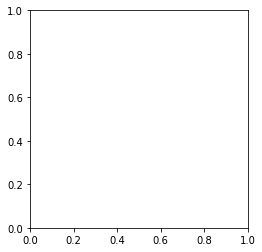

In [71]:
#Can I map this!?!

gdf.plot()

plt.show()  # invoking Matplotlib/PyPlot, as we've always done

In [66]:
# :(
# Maybe we can snag other stuff from the demo
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [97]:
%%capture
!pip install geoplot;
import geoplot

In [98]:
location = data.loc[data.facility_name == 'St. Anthony Medical Clinic']

ax = geoplot.polyplot(location, projection=geoplot.crs.Robinson())

ax.outline_patch.set_visible(True)  # show the map outline

plt.show()

AttributeError: 'dict' object has no attribute 'loc'

In [48]:
# Found this online about working with URLs
import requests
url = 'https://data.sfgov.org/resource/jhsu-2pka.geojson'
response = requests.get(url)
data = response.json()
df = pd.io.json.json_normalize(data['features'])

In [50]:
%%capture
!pip install geoplot;
import geoplot

hospitals = gpd.read_file(gdf ['location'])

ax = geoplot.pointplot(hospitals, s = 1)  # size of each point

ax.set_title("Healthcare Facilities in SF")

plt.show()

AttributeError: 'Series' object has no attribute 'startswith'

### This clearly ain't working - I think the problem is the URL sourcing - let's move the Json data on to datahub and work from there!

In [74]:
# Let's do this for healthcare facilities first

import geopandas as gpd
import matplotlib.pyplot as plt

In [75]:
pip install geopandas matplotlib

You are using pip version 9.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [76]:
%matplotlib inline

In [77]:
#Make sure I have a big enough window
plt.rcParams['figure.figsize'] = (20, 10)

In [89]:
df1_places = gpd.read_file('Health Care Facilities.geojson')
df1_admin = gpd.read_file('Health Care Facilities.geojson')

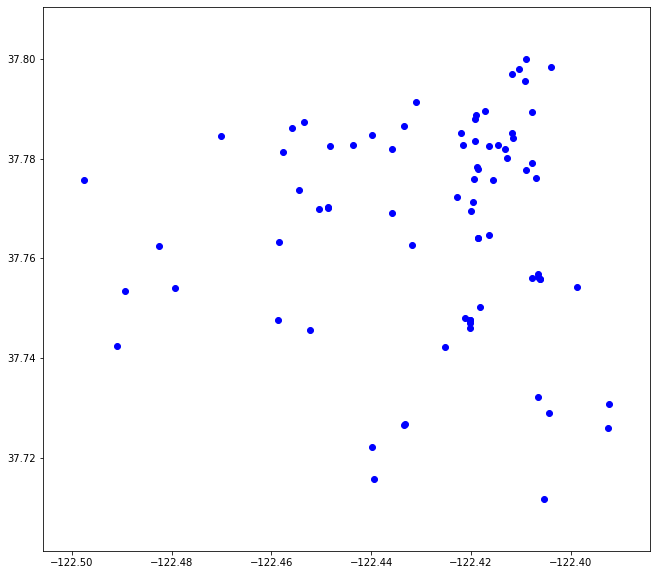

In [90]:
ax = df1_admin.plot(color='blue')

In [ ]:
# It seems to work, now let's do it for the transit network!

In [87]:
df2_places = gpd.read_file('Muni Simple Routes.geojson')
df2_admin = gpd.read_file('Muni Simple Routes.geojson')

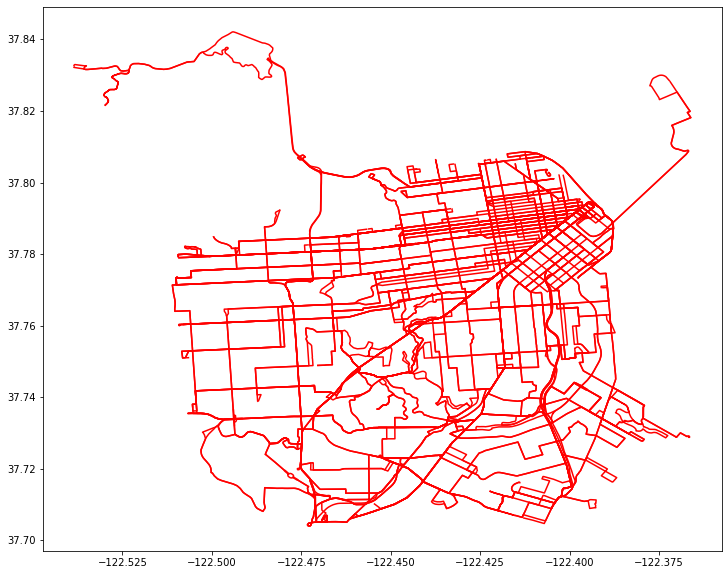

In [88]:
ax = df2_admin.plot(color='red')

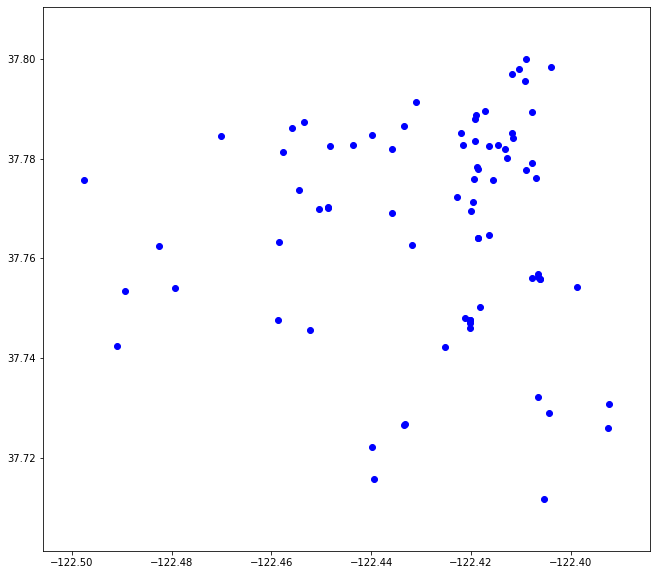

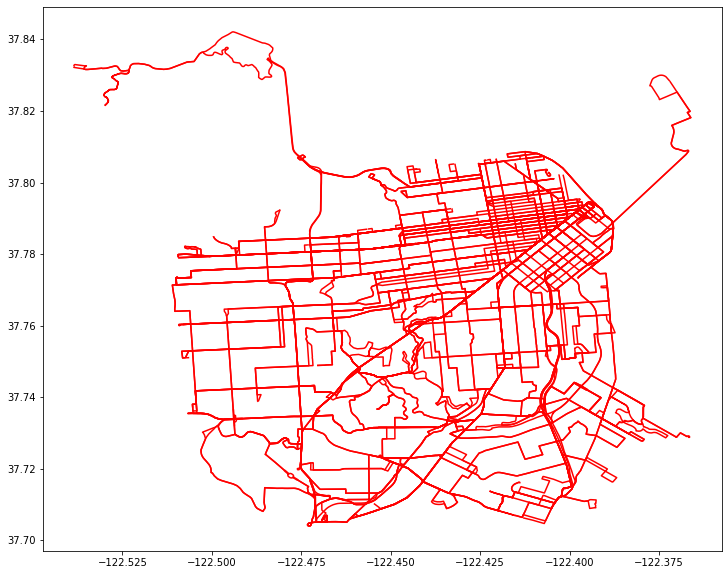

In [95]:
# Can they be on the same map?
ax = df1_admin.plot(color='blue')
df2_admin.plot(color='red')

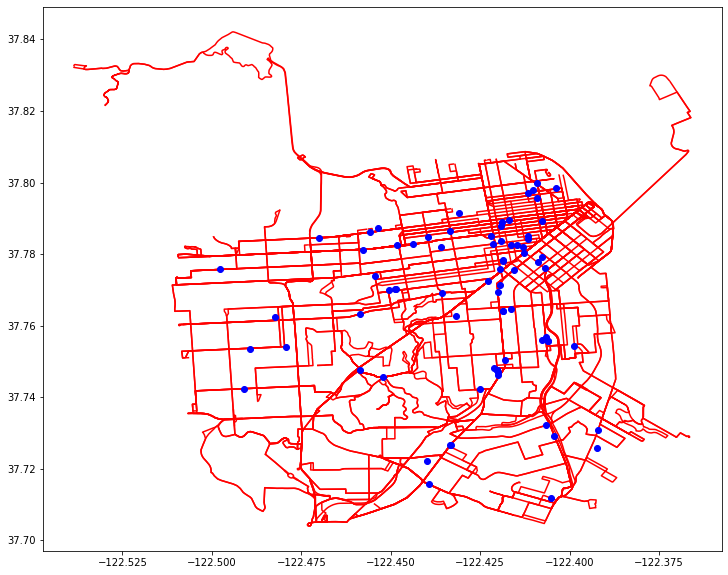

In [112]:
#Want to get these in the same map! - What does the web say?
    
ax = df1_admin.plot(color='blue', zorder=2)

df2_admin.plot(ax=ax, color='red', zorder=1)

In [ ]:
# Successsssss!

In [2]:
#Let's start by using pandas
import pandas as pd

In [3]:
# 1!! 

#Import central control data
sfmta_data = pd.read_csv("https://www.dropbox.com/s/k4olqc43dpgb2iu/SFMTA_intoxpassenger_2010-1.2020.csv?dl=1")

#preview the data
sfmta_data.head()

,ACTION_TAKEN,CALL_DATE,CALL_FROM,CALL_TIME,Category,Message search terms,Sub Category,Sum of Incidents,Sum of Vehicle Delay Time,Measure Param,...,VEHICLE,VEHICLE_DELAY_TIME_END,VEHICLE_DELAY_TIME_START,VEHICLE_NEW,VEHICLE_NEW_NUM_1,VEHICLE_NEW_NUM_2,VEH_DELAY,VIA,Veh_Delay_Time (copy),Vehicle Delay Minutes per Incident
0,"5T61 RESPONDED, SFPD 3B12D , MEDIC 74 TRANSPOR...",1/27/2020,4C22,18:43,Passenger Incident,0,Intoxicated Passenger,1,65.0,1,...,1457,1/27/2020 19:48,1/27/2020 18:43,NaN,NaN,NaN,18:43 - 19:48,R,65.0,65.0
1,MEDIC 52 CAD # 3868 NOTIFIED AND RESPONDED /...,1/25/2020,OPERATOR,23:16,Passenger Incident,0,Intoxicated Passenger,1,54.0,1,...,5706,1/27/2020 0:10,1/26/2020 23:16,NaN,NaN,NaN,23:16 - 00:10,R,54.0,54.0
2,"SFPD CAD# 52640, UNIT# 3113D, MOBILE 148 RESP...",1/25/2020,OPERATOR,17:00,Passenger Incident,0,Intoxicated Passenger,1,81.0,1,...,8819,1/25/2020 18:21,1/25/2020 17:00,NaN,NaN,NaN,17:00 - 18:21,R,81.0,81.0
3,1C-17B GAMEZ NOTIFIED TMC 6 REQUESTING SFPD. R...,1/24/2020,OPERATOR,16:02,Passenger Incident,0,Intoxicated Passenger,1,138.0,1,...,6618,1/24/2020 18:20,1/24/2020 16:02,NaN,NaN,NaN,16:02 - 18:20,R,138.0,138.0
4,5T-64/PITCHER RESPONDED AND CLEARED. NO DELAY ...,1/22/2020,OPERATOR,19:27,Passenger Incident,0,Intoxicated Passenger,1,NaN,1,...,1539-1487,NaN,NaN,NaN,NaN,NaN,00:00 - 00:00,R,NaN,NaN


In [4]:
sfmta_data.describe()

,Message search terms,Sum of Incidents,Sum of Vehicle Delay Time,Measure Param,LOCATION_ORIGINAL,Number of Records,RUN,TAG_ID,VEHICLE_NEW_NUM_2,Veh_Delay_Time (copy),Vehicle Delay Minutes per Incident
count,2622.000000,2622.0,2412.000000,2622.0,0.0,2622.0,2399.000000,2.622000e+03,2.000000,2412.000000,2412.000000
mean,0.048818,1.0,30.615672,1.0,NaN,1.0,336.799500,1.467568e+06,1450.000000,30.615672,30.615672
std,0.645399,0.0,75.007996,0.0,NaN,0.0,209.871553,1.159594e+05,11.313708,75.007996,75.007996
min,0.000000,1.0,0.000000,1.0,NaN,1.0,0.000000,1.280143e+06,1442.000000,0.000000,0.000000
25%,0.000000,1.0,11.000000,1.0,NaN,1.0,148.000000,1.366055e+06,1446.000000,11.000000,11.000000
50%,0.000000,1.0,20.000000,1.0,NaN,1.0,317.000000,1.458756e+06,1450.000000,20.000000,20.000000
75%,0.000000,1.0,36.000000,1.0,NaN,1.0,477.000000,1.569520e+06,1454.000000,36.000000,36.000000
max,9.000000,1.0,1437.000000,1.0,NaN,1.0,978.000000,1.677508e+06,1458.000000,1437.000000,1437.000000


In [5]:
sfmta_data.CALL_DATE.describe()

count         2622
unique        1535
top       2/1/2015
freq             6
Name: CALL_DATE, dtype: object

In [6]:
sfmta_data.CALL_TIME.describe()

count      2622
unique     1086
top       18:42
freq         12
Name: CALL_TIME, dtype: object

In [7]:
sfmta_df = sfmta_data

In [8]:
type(sfmta_df)

pandas.core.frame.DataFrame

### Creating new columns for what we're going to look at

In [9]:
sfmta_df['incident_date'] = sfmta_df['CALL_DATE']
sfmta_df['incident_time'] = sfmta_df['CALL_TIME']
sfmta_df['line'] = sfmta_df['LINE']
sfmta_df['caller'] = sfmta_df['CALL_FROM']

In [10]:
#Check to make sure they made it on the table

sfmta_df.head()

,ACTION_TAKEN,CALL_DATE,CALL_FROM,CALL_TIME,Category,Message search terms,Sub Category,Sum of Incidents,Sum of Vehicle Delay Time,Measure Param,...,VEHICLE_NEW_NUM_1,VEHICLE_NEW_NUM_2,VEH_DELAY,VIA,Veh_Delay_Time (copy),Vehicle Delay Minutes per Incident,incident_date,incident_time,line,caller
0,"5T61 RESPONDED, SFPD 3B12D , MEDIC 74 TRANSPOR...",1/27/2020,4C22,18:43,Passenger Incident,0,Intoxicated Passenger,1,65.0,1,...,NaN,NaN,18:43 - 19:48,R,65.0,65.0,1/27/2020,18:43,M,4C22
1,MEDIC 52 CAD # 3868 NOTIFIED AND RESPONDED /...,1/25/2020,OPERATOR,23:16,Passenger Incident,0,Intoxicated Passenger,1,54.0,1,...,NaN,NaN,23:16 - 00:10,R,54.0,54.0,1/25/2020,23:16,6,OPERATOR
2,"SFPD CAD# 52640, UNIT# 3113D, MOBILE 148 RESP...",1/25/2020,OPERATOR,17:00,Passenger Incident,0,Intoxicated Passenger,1,81.0,1,...,NaN,NaN,17:00 - 18:21,R,81.0,81.0,1/25/2020,17:00,29,OPERATOR
3,1C-17B GAMEZ NOTIFIED TMC 6 REQUESTING SFPD. R...,1/24/2020,OPERATOR,16:02,Passenger Incident,0,Intoxicated Passenger,1,138.0,1,...,NaN,NaN,16:02 - 18:20,R,138.0,138.0,1/24/2020,16:02,14R,OPERATOR
4,5T-64/PITCHER RESPONDED AND CLEARED. NO DELAY ...,1/22/2020,OPERATOR,19:27,Passenger Incident,0,Intoxicated Passenger,1,NaN,1,...,NaN,NaN,00:00 - 00:00,R,NaN,NaN,1/22/2020,19:27,N,OPERATOR


### Let's make a new dataframe with select columns

In [11]:
analysis = sfmta_df[['incident_date', 'incident_time', 'line', 'caller']].copy()

In [12]:
analysis.head()

,incident_date,incident_time,line,caller
0,1/27/2020,18:43,M,4C22
1,1/25/2020,23:16,6,OPERATOR
2,1/25/2020,17:00,29,OPERATOR
3,1/24/2020,16:02,14R,OPERATOR
4,1/22/2020,19:27,N,OPERATOR


In [13]:
analysis.describe()

,incident_date,incident_time,line,caller
count,2622,2622,2409,2622
unique,1535,1086,98,220
top,2/1/2015,18:42,14,OPERATOR
freq,6,12,255,2256


In [14]:
analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622 entries, 0 to 2621
Data columns (total 4 columns):
incident_date    2622 non-null object
incident_time    2622 non-null object
line             2409 non-null object
caller           2622 non-null object
dtypes: object(4)
memory usage: 82.0+ KB


In [15]:
#Time to make time digestable

analysis['time'] = pd.to_datetime(analysis['incident_time'], format='%H:%M').dt.time

In [16]:
analysis['hour'] = pd.to_datetime(analysis['incident_time'], format='%H:%M').dt.hour

In [17]:
analysis.head()

,incident_date,incident_time,line,caller,time,hour
0,1/27/2020,18:43,M,4C22,18:43:00,18
1,1/25/2020,23:16,6,OPERATOR,23:16:00,23
2,1/25/2020,17:00,29,OPERATOR,17:00:00,17
3,1/24/2020,16:02,14R,OPERATOR,16:02:00,16
4,1/22/2020,19:27,N,OPERATOR,19:27:00,19


In [18]:
# What does info about lines and time of incidents look like?

analysis.groupby('line').hour.describe()[:10]

,count,mean,std,min,25%,50%,75%,max
line,,,,,,,,
F,1.0,19.000000,NaN,19.0,19.00,19.0,19.00,19.0
1,14.0,15.357143,6.295385,0.0,10.75,17.0,19.75,23.0
10,7.0,16.714286,6.183696,7.0,12.50,19.0,21.50,23.0
103,3.0,3.333333,2.886751,0.0,2.50,5.0,5.00,5.0
105,2.0,3.500000,0.707107,3.0,3.25,3.5,3.75,4.0
108,1.0,12.000000,NaN,12.0,12.00,12.0,12.00,12.0
12,9.0,17.888889,4.400126,10.0,16.00,19.0,20.00,23.0
14,255.0,13.109804,8.017433,0.0,5.00,16.0,20.00,23.0
14L,18.0,14.111111,3.233808,7.0,13.00,14.5,16.00,19.0


In [19]:
#Time to make date digestable too

analysis['date'] = analysis['incident_date'].astype('datetime64[ns]')

In [20]:
analysis['year'] = analysis['incident_date'].astype('datetime64[ns]').dt.year

In [21]:
analysis.head()

,incident_date,incident_time,line,caller,time,hour,date,year
0,1/27/2020,18:43,M,4C22,18:43:00,18,2020-01-27,2020
1,1/25/2020,23:16,6,OPERATOR,23:16:00,23,2020-01-25,2020
2,1/25/2020,17:00,29,OPERATOR,17:00:00,17,2020-01-25,2020
3,1/24/2020,16:02,14R,OPERATOR,16:02:00,16,2020-01-24,2020
4,1/22/2020,19:27,N,OPERATOR,19:27:00,19,2020-01-22,2020


In [22]:
# What does info about date of incidents look like?

analysis.year.describe()

count    2622.000000
mean     2015.834859
std         1.989240
min      2013.000000
25%      2014.000000
50%      2016.000000
75%      2018.000000
max      2020.000000
Name: year, dtype: float64

In [23]:
analysis.date.describe()

count                    2622
unique                   1535
top       2019-06-30 00:00:00
freq                        6
first     2013-04-01 00:00:00
last      2020-01-27 00:00:00
Name: date, dtype: object

In [24]:
# Import the library
import matplotlib.pyplot as plt

# This line allows the plots display to nicely in the notebook.
%matplotlib inline

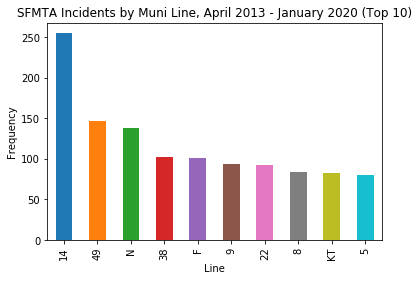

In [25]:
## Let's graph incidents by line!

# add the x-axis label
plt.xlabel("Line")

# add the y-axis label
plt.ylabel("Frequency")

# add the title
plt.title("SFMTA Incidents by Muni Line, April 2013 - January 2020 (Top 10)")

analysis['line'].value_counts()[:10].plot(kind='bar')

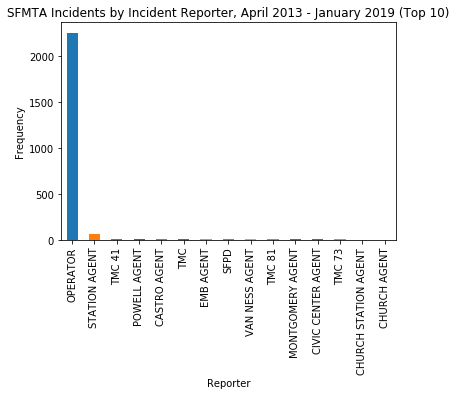

In [26]:
##Let's graph incidents by who reported!

# add the x-axis label
plt.xlabel("Reporter")

# add the y-axis label
plt.ylabel("Frequency")

# add the title
plt.title("SFMTA Incidents by Incident Reporter, April 2013 - January 2019 (Top 10)")

analysis['caller'].value_counts()[:15].plot(kind='bar')

### Create a dataframe for the call-ins

In [27]:
#Let's get to know info about the reporters!

reporter = analysis['caller']
reporter = reporter.astype(str)
reporter.head()

0        4C22
1    OPERATOR
2    OPERATOR
3    OPERATOR
4    OPERATOR
Name: caller, dtype: object

### How to best filter for station agents and create a simplified bar graph of reporting

In [28]:
#original syntax for new df
reporter2 = analysis['caller'].str.contains('AGE')
sum(reporter2)

138

In [29]:
# Check Out Later
agent_call = reporter.loc[analysis.caller.str.contains("AGE")]
len(agent_call)

138

In [30]:
operator_call = reporter.loc[(analysis.caller == 'OPERATOR')]
len(operator_call)

2256

In [31]:
nonoperator_call = reporter.loc[~analysis.caller.isin(['OPERATOR','SFPD', 'BART POLICE', 'SFPD CAD#3605', 'SFPD DISPATCHER'])]
#nonoperator_call = reporter.loc[(analysis.caller == 'SFPD') == False]
len(nonoperator_call)

357

In [32]:
police_call = reporter.loc[analysis.caller.isin(['SFPD', 'BART POLICE', 'SFPD CAD#3605', 'SFPD DISPATCHER'])]
len(police_call)

9

In [33]:
simple_caller = analysis.drop(['incident_date', 'incident_time', 'line', 'caller', 'time', 'hour', 'date', 'year'], axis = 1)
simple_caller['operator'] = operator_call
simple_caller['agent'] = agent_call
simple_caller['police'] = police_call
simple_caller['other'] = nonoperator_call
#simple_caller

simple_caller.head()

,operator,agent,police,other
0,NaN,NaN,NaN,4C22
1,OPERATOR,NaN,NaN,NaN
2,OPERATOR,NaN,NaN,NaN
3,OPERATOR,NaN,NaN,NaN
4,OPERATOR,NaN,NaN,NaN


In [34]:
simple_caller.loc[simple_caller['operator'].notnull(), 'operator'] = 1
simple_caller.loc[simple_caller['operator'].isnull(), 'operator'] = 0
simple_caller.loc[simple_caller['agent'].notnull(), 'agent'] = 1
simple_caller.loc[simple_caller['agent'].isnull(), 'agent'] = 0
simple_caller.loc[simple_caller['police'].notnull(), 'police'] = 1
simple_caller.loc[simple_caller['police'].isnull(), 'police'] = 0
simple_caller.loc[simple_caller['other'].notnull(), 'other'] = 1
simple_caller.loc[simple_caller['other'].isnull(), 'other'] = 0

simple_caller.head()

,operator,agent,police,other
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


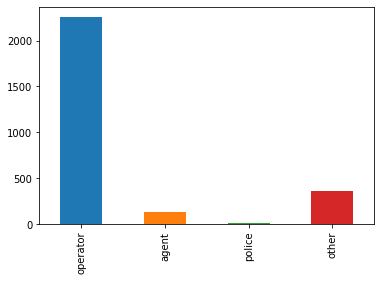

In [35]:
# Graph of calls by operators, police, station agents, and other
simple_caller.sum().plot(kind='bar')

### Ideas for later
### Incidents by time of day

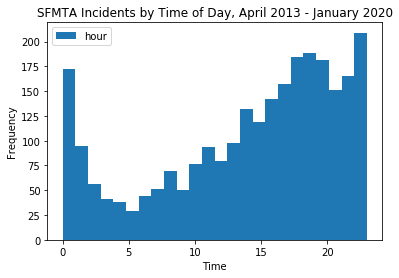

In [36]:
cc_time = pd.Series(analysis['hour'])
cc_time.plot.hist(bins=24)

# add the x-axis label
plt.xlabel("Time")

# add the y-axis label
plt.ylabel("Frequency")

# add the legend
plt.legend()

# add the title
plt.title("SFMTA Incidents by Time of Day, April 2013 - January 2020")

# show the plot
plt.show()

### Incidents by year

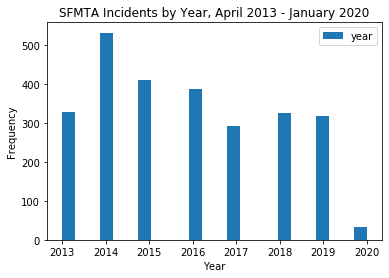

In [74]:
cc_time = pd.Series(analysis['year'])
cc_time.plot.hist(bins=24)

# add the x-axis label
plt.xlabel("Year")

# add the y-axis label
plt.ylabel("Frequency")

# add the legend
plt.legend()

# add the title
plt.title("SFMTA Incidents by Year, April 2013 - January 2020")

# show the plot
plt.show()

In [38]:
# Why are there gaps in the bars? - Let's see what the data looks like by month
analysis['month'] = analysis['incident_date'].astype('datetime64[ns]').dt.month
analysis.head()

,incident_date,incident_time,line,caller,time,hour,date,year,month
0,1/27/2020,18:43,M,4C22,18:43:00,18,2020-01-27,2020,1
1,1/25/2020,23:16,6,OPERATOR,23:16:00,23,2020-01-25,2020,1
2,1/25/2020,17:00,29,OPERATOR,17:00:00,17,2020-01-25,2020,1
3,1/24/2020,16:02,14R,OPERATOR,16:02:00,16,2020-01-24,2020,1
4,1/22/2020,19:27,N,OPERATOR,19:27:00,19,2020-01-22,2020,1


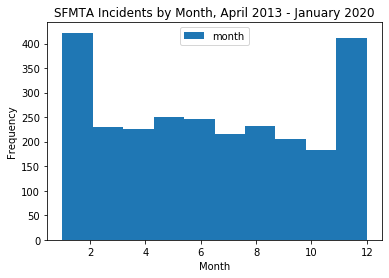

In [54]:
cc_time = pd.Series(analysis['month'])
cc_time.plot.hist()

# add the x-axis label
plt.xlabel("Month")

# add the y-axis label
plt.ylabel("Frequency")

# add the legend
plt.legend()

# add the title
plt.title("SFMTA Incidents by Month, April 2013 - January 2020")

# show the plot
plt.show()

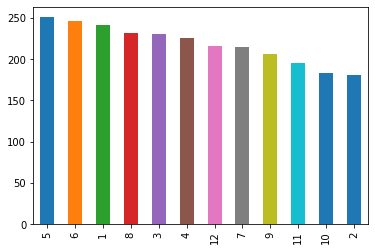

In [78]:

analysis.month.value_counts().plot(kind='bar')
#clearly there's something weird here!

In [41]:
#group by hour and sum by incidents
#KDE


### Try using seaborn

In [104]:
import seaborn as sns
sns.set()  # activate the Seaborn aesthetic defaults

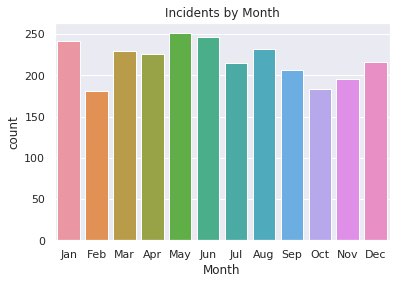

In [105]:
# Let's do 'Month' again because it's looking weird!

ax=sns.countplot(data=analysis, x='month')

ax.set_title("Incidents by Month")
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_xlabel('Month')

plt.show()

# Love this!

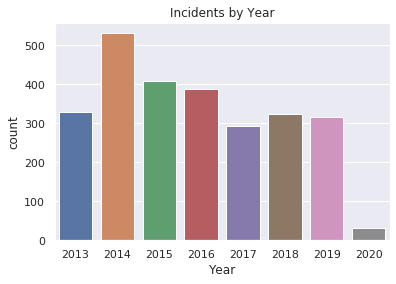

In [106]:
# Let's do 'Year' again because why not?!

ax=sns.countplot(data=analysis, x='year')

ax.set_title("Incidents by Year")
ax.set_xticklabels(['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
ax.set_xlabel('Year')

plt.show()

# Love this!

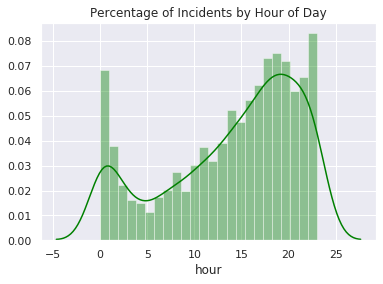

In [148]:
data = analysis.loc[analysis.hour]   # but trips

# Note that a distplot takes a Series directly, rather than a DataFrame + colnames
ax = sns.distplot(a=analysis.hour,
                  bins = 24,
                  color = 'green',
                  kde = True) #If you remove kde the Y axis changes to counts instead

ax.set_title('Percentage of Incidents by Hour of Day')
plt.show()

In [162]:
data = analysis.loc[analysis.hour]   # but trips

# Note that a distplot takes a Series directly, rather than a DataFrame + colnames
ax = sns.regplot(x = analysis['line'].value_counts()[:10].index,
                 y = analysis['hour']
                 #fit_reg = True) #If you remove kde the Y axis changes to counts instead

ax.set_title('Percentage of Incidents by Hour of Day')
plt.show()

SyntaxError: invalid syntax (<ipython-input-162-c385e3b2cd6c>, line 8)

### Let's look at this stuff by line!

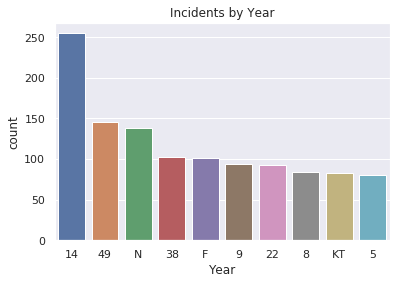

In [140]:
ax=sns.countplot(data = analysis, 
                 x='line', 
                 order = analysis['line'].value_counts()[:10].index,
                 )

ax.set_title("Incidents by Line")
#ax.set_xticklabels([])
ax.set_xlabel('Line')

plt.show()

# Love this!

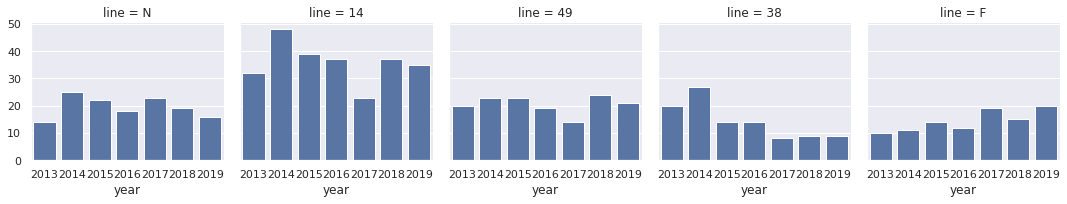

In [168]:
# Let's look at incidents by year on the top 5 lines

data = analysis.loc[analysis.line.isin(['14','49','N', '38', 'F'])]

group = sns.FacetGrid(data, col='line')
group.map(sns.countplot, 'year')

plt.show()

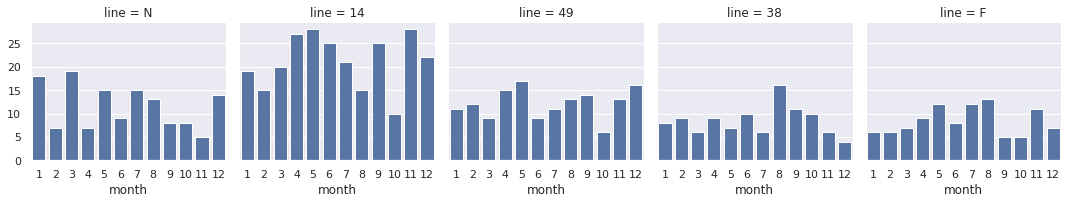

In [169]:
# Let's look at incidents by month on the top 5 lines

data = analysis.loc[analysis.line.isin(['14','49','N', '38', 'F'])]

group = sns.FacetGrid(data, col='line')
group.map(sns.countplot, 'month')

plt.show()

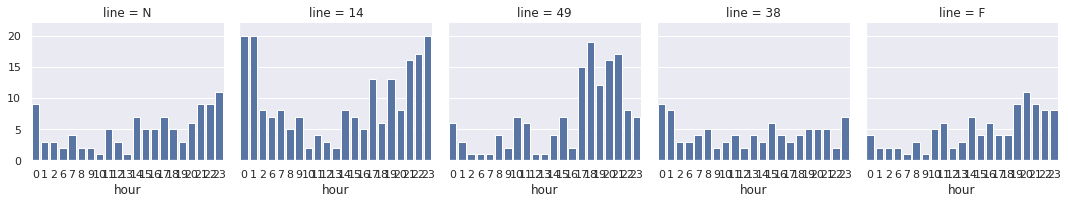

In [173]:
# Let's look at incidents by time on the top 5 lines

data = analysis.loc[analysis.line.isin(['14','49','N', '38', 'F'])]

group = sns.FacetGrid(data, col='line')
group.map(sns.countplot, 'hour')

plt.show()

In [ ]:
import requests

In [ ]:
import geopandas as gpd
import rtree as rt
#print(gpd.__version__)  # note this is a pretty old version

#testing out syntax 
print(gpd.__version__) #you have to have two underscores next to the beginning and ending of version 
import networkx as nx
import numpy as np
import osmnx as ox
ox.config(log_console=True, use_cache=True)
ox.__version__

In [ ]:
sf = ox.gdf_from_place('San Francisco, California')
ox.plot_shape(ox.project_gdf(sf))

In [ ]:
sf

In [ ]:
ox.save_gdf_shapefile(sf)

In [ ]:
G = ox.graph_from_place('San Francisco, California', network_type='drive')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)


# Look at this notebook for more info on origin destination https://github.com/gboeing/osmnx-examples/blob/master/notebooks/12-node-elevations-edge-grades.ipynb


# #This section is for orgin destination trials 


In [ ]:
#this is the original code for orgin and destination
#orig_node = ox.get_nearest_node(G, (37.828903, -122.245846))
#dest_node = ox.get_nearest_node(G, (37.812303, -122.215006))
#is there a way to loop origin and destination to be at many different points? Perhaps based on a column of data?

# This part is for interactive maps 


In [1]:
import networkx as nx
import osmnx as ox
from IPython.display import IFrame
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.11.4'

In [2]:
G = ox.graph_from_place('San Francisco, California, USA', network_type='drive')

In [3]:
graph_map = ox.plot_graph_folium(G, popup_attribute='name', edge_width=2)

In [4]:
filepath = 'data/graph.html'
graph_map.save(filepath)
IFrame(filepath, width=600, height=500)

In [1]:
#Let's start with using pandas
import pandas as pd

In [2]:
# 2!! 

#Bring in the Health Care Facilities with JSON

import pandas as pd

import json      # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint    # library for cleanly printing Python data structures
pp = pprint.PrettyPrinter()






# # # Opioid Data at the Zip Code Level
There are data for deaths, ED visits, hospitalizations, and prescriptions 


3/4 - Need to merge the dataframes.






In [3]:
# 4!!

# import opioid death data
opdeath18_data = pd.read_csv("https://www.dropbox.com/s/iblpnv70nhsyrok/Death_SanFrancisco_AnyOpioid_2018.csv?dl=1")
    
opdeath18_data.rename(columns = {'San Francisco Deaths - 2018' : 'Zip Code',
                            'Unnamed: 1': 'Death Rates', 
                             'Unnamed: 2': 'Death 95% LCL', 
                             'Unnamed: 3' : 'Death 95% UCL'}, inplace=True)
#preview the data
opdeath18_data.head()

,Zip Code,Death Rates,Death 95% LCL,Death 95% UCL
0,Any Opioid-Related Overdose : Age-Adjusted Rat...,NaN,NaN,NaN
1,Zip Code,Rates,95% LCL,95% UCL
2,94102,94.85,65.07,172.54
3,94103,60.02,36.27,120.56
4,94104,156.97,3.97,4430.61


In [4]:
#cut out the top two rows bc they are metadata
opdeath18cln = opdeath18_data.drop(opdeath18_data.index[[0,1,29,30,31,32]])

In [5]:
print(opdeath18cln)

   Zip Code Death Rates Death 95% LCL Death 95% UCL
2     94102       94.85         65.07        172.54
3     94103       60.02         36.27        120.56
4     94104      156.97          3.97       4430.61
5     94105       10.92          0.28        588.25
6     94107        7.02          0.85         51.69
7     94108       21.45          5.45        117.03
8     94109       20.81         10.36         64.83
9     94110        21.2         12.46         39.84
10    94111           0             0             0
11    94112       10.29          4.55         21.62
12    94114        2.35          0.06         54.13
13    94115        8.29          1.94         43.92
14    94116           0             0         15.36
15    94117       14.19           5.5         48.17
16    94118        7.85          1.59         42.55
17    94121           0             0         23.47
18    94122        3.44          0.32         17.66
19    94123        4.57          0.12         68.71
20    94124 

In [6]:
# 5!! CA Opioid data

#Import the opioid ED Visit 2018 data

oped18_data = pd.read_csv("https://www.dropbox.com/s/1a8v10nnam0788j/EdVisit_SanFrancisco_AnyOpioid_2018.csv?dl=1")

oped18_data.rename(columns = {'San Francisco ED Visits - 2018' : 'Zip Code',
                            'Unnamed: 1': 'ED Rates', 
                             'Unnamed: 2': 'ED 95% LCL', 
                             'Unnamed: 3' : 'ED 95% UCL'}, inplace=True)

#preview the data
oped18_data.head()

,Zip Code,ED Rates,ED 95% LCL,ED 95% UCL
0,Any Opioid-Related Overdose : Age-Adjusted Rat...,NaN,NaN,NaN
1,Zip Code,Rates,95% LCL,95% UCL
2,94102,285.88,232.83,378.8
3,94103,285.97,228.76,372.35
4,94104,1525.1,341.92,6171.31


In [7]:
#drop rows 0 and 1, which are metadata 
oped18cln = oped18_data.drop(oped18_data.index[[0,1,29,30,31,32]])

In [8]:
oped18cln.describe()

,Zip Code,ED Rates,ED 95% LCL,ED 95% UCL
count,27,27,27,27
unique,27,27,27,27
top,94158,71.07,2.74,949.32
freq,1,1,1,1


In [9]:
# 6!!

#Import the opioid Hospitilization 2018 data

Ophosp18_data = pd.read_csv("https://www.dropbox.com/s/0rcfdjy3lg40gqq/Hospit_SanFrancisco_AnyOpioid_2018.csv?dl=1")
Ophosp18_data.rename(columns = {'San Francisco Hospitalizations - 2018': 'Zip Code',  
                            'Unnamed: 1': 'Hosp Rates', 
                             'Unnamed: 2': 'Hosp 95% LCL', 
                             'Unnamed: 3' : 'Hosp 95% UCL'}, inplace=True)

#preview the data
Ophosp18_data.head()

,Zip Code,Hosp Rates,Hosp 95% LCL,Hosp 95% UCL
0,Any Opioid-Related Overdose : Age-Adjusted Ra...,NaN,NaN,NaN
1,Zip Code,Rates,95% LCL,95% UCL
2,94102,21.66,10.6,93.68
3,94103,33.7,17.3,90.52
4,94104,0,0,0


In [10]:
ophosp18cln = Ophosp18_data.drop(Ophosp18_data.index[[0,1,29,30,31,32]])

In [11]:
ophosp18cln.describe()

,Zip Code,Hosp Rates,Hosp 95% LCL,Hosp 95% UCL
count,27,27,27,27
unique,27,22,21,27
top,94158,0,0,30.24
freq,1,6,6,1


In [12]:
# 7!!

#Import the opioid prescription 2018 data
oppres18_data = pd.read_csv('https://www.dropbox.com/s/jse6c8p047p0gh8/Prescrip_SanFrancisco_AnyOpioid_2018.csv?dl=1')

oppres18_data.rename(columns = {'San Francisco Prescriptions - 2018' : 'Zip Code',
                            'Unnamed: 1': 'Pres Rates', 
                             'Unnamed: 2': 'Pres 95% LCL', 
                             'Unnamed: 3' : 'Pres 95% UCL'}, inplace=True)

#preview the data
oppres18_data.head()

,Zip Code,Pres Rates,Pres 95% LCL,Pres 95% UCL
0,Opioid Prescriptions by Patient Location : Age...,NaN,NaN,NaN
1,Zip Code,Rates,95% LCL,95% UCL
2,94102,412.38,405.7,419.32
3,94103,392.68,385.52,400.06
4,94104,1390.63,1239.6,1563.63


In [13]:
oppres18cln = oppres18_data.drop(oppres18_data.index[[0,1,29,30,31,32]])

In [14]:
oppres18cln.describe()

,Zip Code,Pres Rates,Pres 95% LCL,Pres 95% UCL
count,27,27,27,27
unique,27,27,27,27
top,94158,196.56,199.1,311.24
freq,1,1,1,1


In [15]:
result = pd.merge(opdeath18cln,
                 oped18cln,
                 # ophosp18cln,
                 # oppres18cln,
                 on='Zip Code')
result.head()

,Zip Code,Death Rates,Death 95% LCL,Death 95% UCL,ED Rates,ED 95% LCL,ED 95% UCL
0,94102,94.85,65.07,172.54,285.88,232.83,378.8
1,94103,60.02,36.27,120.56,285.97,228.76,372.35
2,94104,156.97,3.97,4430.61,1525.1,341.92,6171.31
3,94105,10.92,0.28,588.25,243.68,35.71,949.32
4,94107,7.02,0.85,51.69,40.11,21.52,88.61


In [16]:
result2 = pd.merge(ophosp18cln,
                 oppres18cln,
                  on='Zip Code')
result2.head()

,Zip Code,Hosp Rates,Hosp 95% LCL,Hosp 95% UCL,Pres Rates,Pres 95% LCL,Pres 95% UCL
0,94102,21.66,10.6,93.68,412.38,405.7,419.32
1,94103,33.7,17.3,90.52,392.68,385.52,400.06
2,94104,0,0,0,1390.63,1239.6,1563.63
3,94105,0,0,581.23,368.31,350.04,388.88
4,94107,1.41,0.04,45.37,268.74,262.5,275.19


In [17]:
resultx = pd.merge(result, 
                 result2,
                 on='Zip Code')
resultx.head()

,Zip Code,Death Rates,Death 95% LCL,Death 95% UCL,ED Rates,ED 95% LCL,ED 95% UCL,Hosp Rates,Hosp 95% LCL,Hosp 95% UCL,Pres Rates,Pres 95% LCL,Pres 95% UCL
0,94102,94.85,65.07,172.54,285.88,232.83,378.8,21.66,10.6,93.68,412.38,405.7,419.32
1,94103,60.02,36.27,120.56,285.97,228.76,372.35,33.7,17.3,90.52,392.68,385.52,400.06
2,94104,156.97,3.97,4430.61,1525.1,341.92,6171.31,0,0,0,1390.63,1239.6,1563.63
3,94105,10.92,0.28,588.25,243.68,35.71,949.32,0,0,581.23,368.31,350.04,388.88
4,94107,7.02,0.85,51.69,40.11,21.52,88.61,1.41,0.04,45.37,268.74,262.5,275.19


In [23]:
resultx.columns

Index(['Zip Code', 'Death Rates', 'Death 95% LCL', 'Death 95% UCL', 'ED Rates',
       'ED 95% LCL', 'ED 95% UCL', 'Hosp Rates', 'Hosp 95% LCL',
       'Hosp 95% UCL', 'Pres Rates', 'Pres 95% LCL', 'Pres 95% UCL'],
      dtype='object')

# Now to visualize


In [28]:
analysis = resultx[['Zip Code', 'Death Rates', 'ED Rates', 'Hosp Rates', 'Pres Rates']].copy()

In [32]:
analysis.head()

,Zip Code,Death Rates,ED Rates,Hosp Rates,Pres Rates
0,94102,94.85,285.88,21.66,412.38
1,94103,60.02,285.97,33.7,392.68
2,94104,156.97,1525.1,0,1390.63
3,94105,10.92,243.68,0,368.31
4,94107,7.02,40.11,1.41,268.74


In [34]:
analysis.describe()

,Zip Code,Death Rates,ED Rates,Hosp Rates,Pres Rates
count,27,27,27,27,27
unique,27,21,27,22,27
top,94158,0,71.07,0,196.56
freq,1,7,1,6,1


In [35]:
analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Zip Code     27 non-null     object
 1   Death Rates  27 non-null     object
 2   ED Rates     27 non-null     object
 3   Hosp Rates   27 non-null     object
 4   Pres Rates   27 non-null     object
dtypes: object(5)
memory usage: 1.3+ KB


In [39]:
analysis.groupby('Zip Code').describe()[:10]

Death Rates                     ED Rates                      \
               count unique     top freq    count unique     top freq   
Zip Code                                                                
94102              1      1   94.85    1        1      1  285.88    1   
94103              1      1   60.02    1        1      1  285.97    1   
94104              1      1  156.97    1        1      1  1525.1    1   
94105              1      1   10.92    1        1      1  243.68    1   
94107              1      1    7.02    1        1      1   40.11    1   
94108              1      1   21.45    1        1      1   76.01    1   
94109              1      1   20.81    1        1      1   113.8    1   
94110              1      1    21.2    1        1      1   41.87    1   
94111              1      1       0    1        1      1   455.9    1   
94112              1      1   10.29    1        1      1   21.99    1   

         Hosp Rates                    Pres Rates                       
              count unique    top freq      count unique      top freq  
Zip Code                                                                
94102             1      1  21.66    1          1      1   412.38    1  
94103             1      1   33.7    1          1      1   392.68    1  
94104             1      1      0    1          1      1  1390.63    1  
94105             1      1      0    1          1      1   368.31    1  
94107             1      1   1.41    1          1      1   268.74    1  
94108             1      1  15.09    1          1      1    137.6    1  
94109             1      1  17.43    1          1      1   297.57    1  
94110             1      1   8.23    1          1      1   290.76    1  
94111             1      1      0    1          1      1   287.25    1  
94112             1      1   10.4    1          1      1   347.61    1

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns